Looking at the photometric uncertainties from the Legacy survey DR7 sweep files

In [1]:
import os
import h5py 
import numpy as np 
from feasibgs import util as feasUT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
# read in the GAMA+Legacy joint file 
fsweep = os.path.join(feasUT.dat_dir(), 'legacy', 'sweep', 'legacy_gama_sweeps.hdf5')
sweep = h5py.File(fsweep, 'r')

In [4]:
g = sweep['data/flux_g'].value
r = sweep['data/flux_r'].value
z = sweep['data/flux_z'].value

g_err = sweep['data/flux_ivar_g'].value**-0.5
r_err = sweep['data/flux_ivar_r'].value**-0.5
z_err = sweep['data/flux_ivar_z'].value**-0.5

mag_g = feasUT.flux2mag(g, method='log')
mag_r = feasUT.flux2mag(r, method='log')
mag_z = feasUT.flux2mag(z, method='log')
mag_g_err = np.abs(g_err/g * -2.5/np.log(10))
mag_r_err = np.abs(r_err/r * -2.5/np.log(10))
mag_z_err = np.abs(z_err/z * -2.5/np.log(10))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in power
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys
/anaconda2/lib/python2.7/site-packages/feasibgs/util.py:31: RuntimeWarning: divide by zero encountered in log10
  return 22.5 - 2.5 * np.log10(flux)
/anaconda2/lib/python2.7/site-packages/feasibgs/util.py:31: RuntimeWarning: invalid value encountered in log10
  return 22.5 - 2.5 * np.log10(flux)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in divide
  del sys.path[0]
/anaconda2/lib/python2.7/site-packages/ipykernel_launch

In [9]:
rcut = (mag_r < 20.5)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [11]:
g_sn = g/g_err
r_sn = r/r_err
z_sn = z/z_err
for k, sn in zip(['g', 'r', 'z'], [g_sn, r_sn, z_sn]):
    print('%s band SN %f' % (k, np.median(sn[rcut])))

g band SN 180.065002
r band SN 276.440796
z band SN 306.155884


In [10]:
mag_g_sn = mag_g/mag_g_err
mag_r_sn = mag_r/mag_r_err
mag_z_sn = mag_z/mag_z_err
for k, sn in zip(['g', 'r', 'z'], [mag_g_sn, mag_r_sn, mag_z_sn]):
    print('%s band SN %f' % (k, np.median(sn[np.isfinite(sn) & rcut])))

g band SN 3268.298584
r band SN 4752.029297
z band SN 5081.469238


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
g_r = mag_g[rcut] - mag_r[rcut]
r_z = mag_r[rcut] - mag_z[rcut]

Text(0.5,0,'$g-r$')

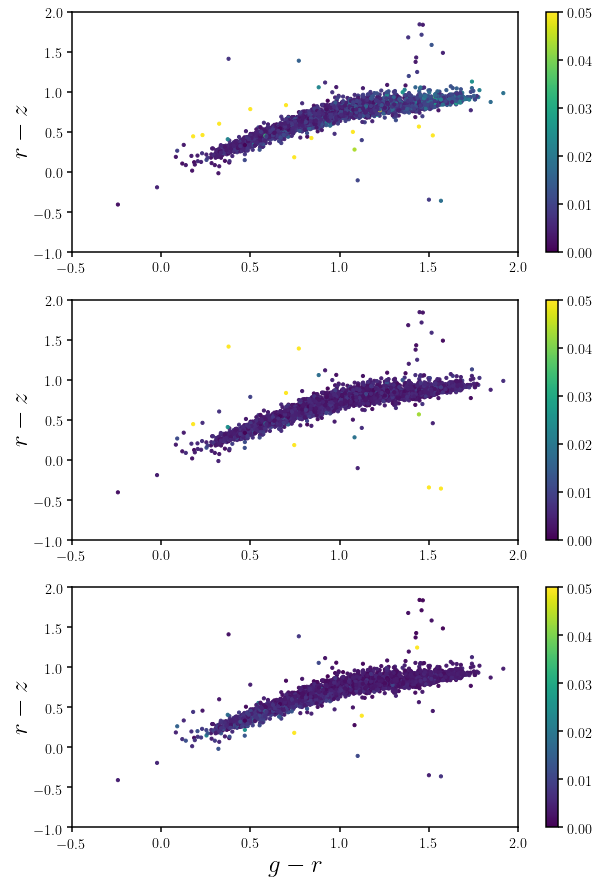

In [58]:
fig = plt.figure(figsize=(10,15))
for i, mag_err in enumerate([mag_g_err, mag_r_err, mag_z_err]):
    sub = fig.add_subplot(3,1,i+1)
    scat = sub.scatter(g_r[::10], r_z[::10], c=mag_err[rcut][::10], s=10, vmin=0., vmax=0.05)
    sub.set_xlim([-0.5, 2])
    sub.set_ylabel('$r-z$', fontsize=25)
    sub.set_ylim([-1, 2])
    plt.colorbar(scat)
sub.set_xlabel('$g-r$', fontsize=25)